In [1]:
# Step 1 - Import necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
# Global variables
separator = "_"*20
divider = "\n" + "*"*90 + "\n"

data = {
    "Feature1": [5, 10, 15, 20, 25, 30, 35, 40, 45, 50],
    "Feature2": [1, 2, 1, 2, 1, 2, 1, 2, 1, 2],
    "Target": [0, 0, 0, 1, 1, 1, 0, 0, 1, 1]
}

# Step 2: Load and Prepare the Dataset
df = pd.DataFrame(data)

print(f"{separator} DataFrame: {separator}")
print(df)
print(divider)
print(f"{separator} DataFrame Summary: {separator}")
print(df.info())
print(divider)
print(f"{separator} First 5 rows of the Dataset: {separator}")
print(df.head())
print(divider)
print(f"{separator} Missing values: {separator}")
print(df.isnull().sum())

____________________ DataFrame: ____________________
   Feature1  Feature2  Target
0         5         1       0
1        10         2       0
2        15         1       0
3        20         2       1
4        25         1       1
5        30         2       1
6        35         1       0
7        40         2       0
8        45         1       1
9        50         2       1

******************************************************************************************

____________________ DataFrame Summary: ____________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Feature1  10 non-null     int64
 1   Feature2  10 non-null     int64
 2   Target    10 non-null     int64
dtypes: int64(3)
memory usage: 372.0 bytes
None

******************************************************************************************

____________________ First 5 rows of

In [3]:
# Step 3: Define features (x) and target (y)
x = df[["Feature1", "Feature2"]]
y = df["Target"]

In [4]:
# Step 4 - Split the dataset into training and test data using train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=42)

In [5]:
# Step 5: Standardize features using StandardScaler (fit on training data, transform both train and test)
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [6]:
# Step 6: Instantiate the SVM model with chosen kernel (e.g, liner RBF) and train it on the scaled training data
svm_model = SVC(kernel="linear", random_state=42)
svm_model.fit(x_train_scaled, y_train)

,C,1.0
,kernel,'linear'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [7]:
# Step 7: Make predictions and Evaluate the Model
y_pred = svm_model.predict(x_test_scaled)
print(">> Accuracy:", accuracy_score(y_test, y_pred))
print("\n>> Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\n>> Classification Report:\n", classification_report(y_test, y_pred))

>> Accuracy: 0.5

>> Confusion Matrix:
 [[1 1]
 [1 1]]

>> Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.50      0.50         2
           1       0.50      0.50      0.50         2

    accuracy                           0.50         4
   macro avg       0.50      0.50      0.50         4
weighted avg       0.50      0.50      0.50         4



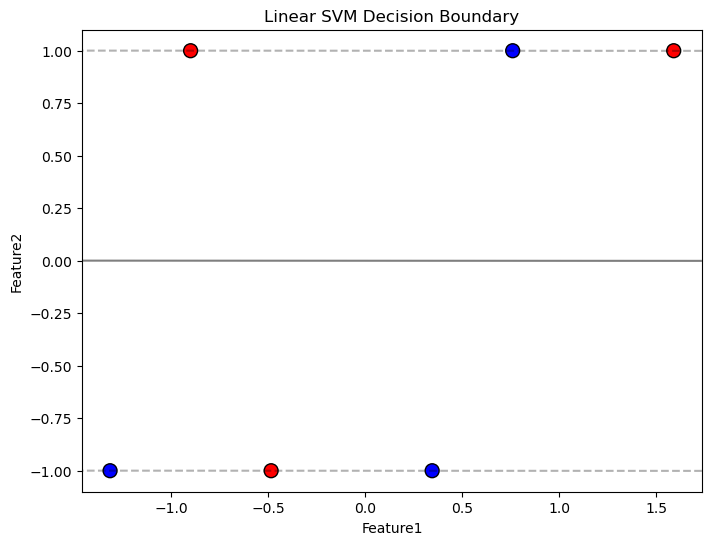

In [8]:
# Step 8: Visualize confusion matrix
plt.figure(figsize=(8, 6))

# Plot data points colored by class
plt.scatter(x_train_scaled[:, 0], x_train_scaled[:, 1], c=y_train, cmap="bwr", edgecolor='k', s=100)
plt.xlabel("Feature1")
plt.ylabel("Feature2")
plt.title("Linear SVM Decision Boundary")

ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# Create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 500)   # corrected np.linespace -> np.linspace
yy = np.linspace(ylim[0], ylim[1], 500)

YY, XX = np.meshgrid(yy, xx)              # corrected np.ma -> np.meshgrid
xy = np.vstack([XX.ravel(), YY.ravel()]).T

# Evaluate decision function for each point in the grid
Z = svm_model.decision_function(xy).reshape(XX.shape)  # corrected 'model' -> 'svm_model'

# Plot decision boundary and margins
plt.contour(XX, YY, Z, colors='k', levels=[0], alpha=0.5, linestyles=['-'])
plt.contour(XX, YY, Z, colors='k', levels=[-1, 1], alpha=0.3, linestyles=['--'])

plt.show()

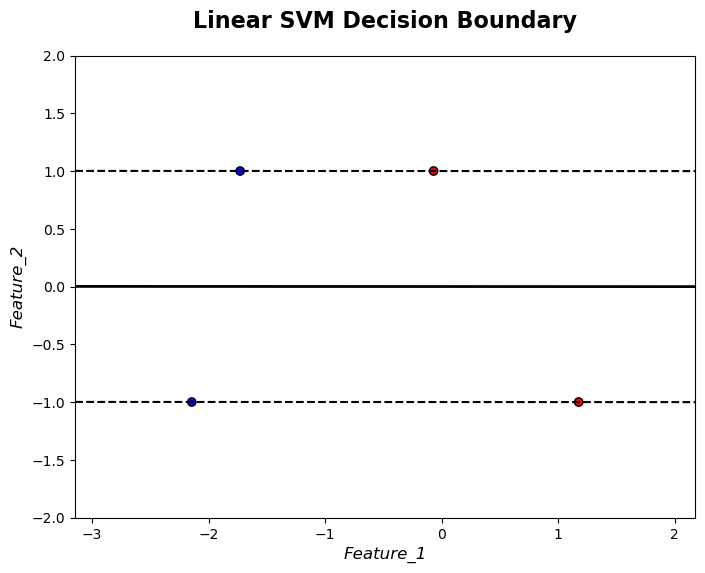

In [9]:
# Plotting Scatter and Plot
plt.figure(figsize=(8, 6))

# Scatter plot of test points colored by class
plt.scatter(x_test_scaled[:, 0], x_test_scaled[:, 1], c=y_test , cmap='bwr', edgecolors = 'k')

# Define grid boundaries based on test data
x_min, x_max = x_test_scaled[:, 0].min() - 1, x_test_scaled[:, 0].max() + 1
y_min, y_max = x_test_scaled[:, 1].min() - 1, x_test_scaled[:, 1].max() + 1

xx , yy = np.meshgrid(np.linspace(x_min, x_max, 500),
                      np.linspace(y_min, y_max, 500))

# Compute the decision function on the grid
Z = svm_model.decision_function(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

# Plot decision boundary and margins
plt.contour(xx, yy, Z, levels = [0], colors = 'k', linewidths = 2) # Hyperplane
plt.contour(xx, yy, Z, levels = [-1, 1], colors = 'k', linestyles = "--") #  Margins (hard and soft margins)

plt.title("Linear SVM Decision Boundary", fontsize=16, fontweight="bold", pad=20)
plt.xlabel("Feature_1", fontsize=12, fontstyle="italic")
plt.ylabel("Feature_2", fontsize=12, fontstyle="italic")
plt.show()